In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Epochs are the number iterations over the whole training set.
#Learning rate indicates how big or small the changes in weights are each optimization step.
learning_rate = 0.01
Epochs = 100

In [3]:
X_Train = np.linspace(-2, 2, 100)

In [4]:
number_coefficients = 4
fixed_coefficients = [1, 2, 3, 4]
Y_Train = 0

In [5]:
for i in range(number_coefficients):
    Y_Train += fixed_coefficients[i] * np.power(X_Train, i)

In [6]:
Y_Train += np.random.randn(*X_Train.shape) * 2

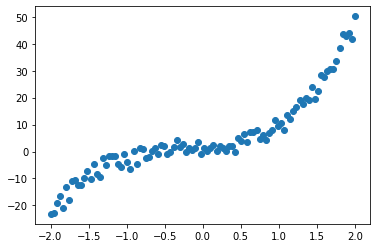

In [7]:
plt.scatter(X_Train, Y_Train)

In [8]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [9]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

In [10]:
def model(X, w):
    terms = []
    for i in range(number_coefficients):
        term = tf.multiply(w[i], tf.pow(X, i))
        terms.append(term)
    return tf.add_n(terms)

In [11]:
w = tf.Variable([0.] * number_coefficients, name="parameters")
y_model = model(X, w)

In [12]:
cost = tf.square(Y-y_model)

In [13]:
#Optimizer that implements the gradient descent algorithm.
training_operation = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [14]:
#tf.compat.v1.Session -> A class for running TensorFlow operations.
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [15]:
#iteration of the learning algorithm.
for epoch in range(Epochs):
    for (x, y) in zip(X_Train, Y_Train):
        sess.run(training_operation, feed_dict={X: x, Y: y})

In [16]:
w_value = sess.run(w)
print(w_value)
sess.close()

[0.91672623 1.2320023  3.2726126  4.970573  ]


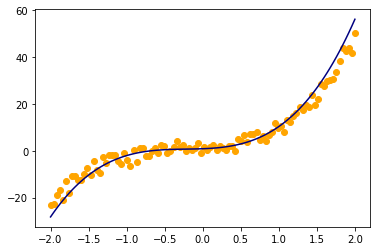

In [17]:
plt.scatter(X_Train, Y_Train, color ='orange')
Y_func = 0
for i in range(number_coefficients):
    Y_func += w_value[i] * np.power(X_Train, i)
plt.plot(X_Train, Y_func, 'navy')